# Chapter 5:pandas: Reading and Writing Data

In this chapter, you will see all of the tools provided by pandas for reading data stored in many types of media (such as files and databases). In parallel, you will also see how to write data structures directly on these formats, without worrying too much about the technologies used.

## Reading Data in CSV or Text Files

## I/O API(Application Programming Interface) Tools

### Pandas is a library specialized for data analysis,that it is mainly focused on calculation and data processing. The processes of writing and reading data from/to external files can be considered part of data processing. 

## These functions are divided into two main categories: readers and writers.

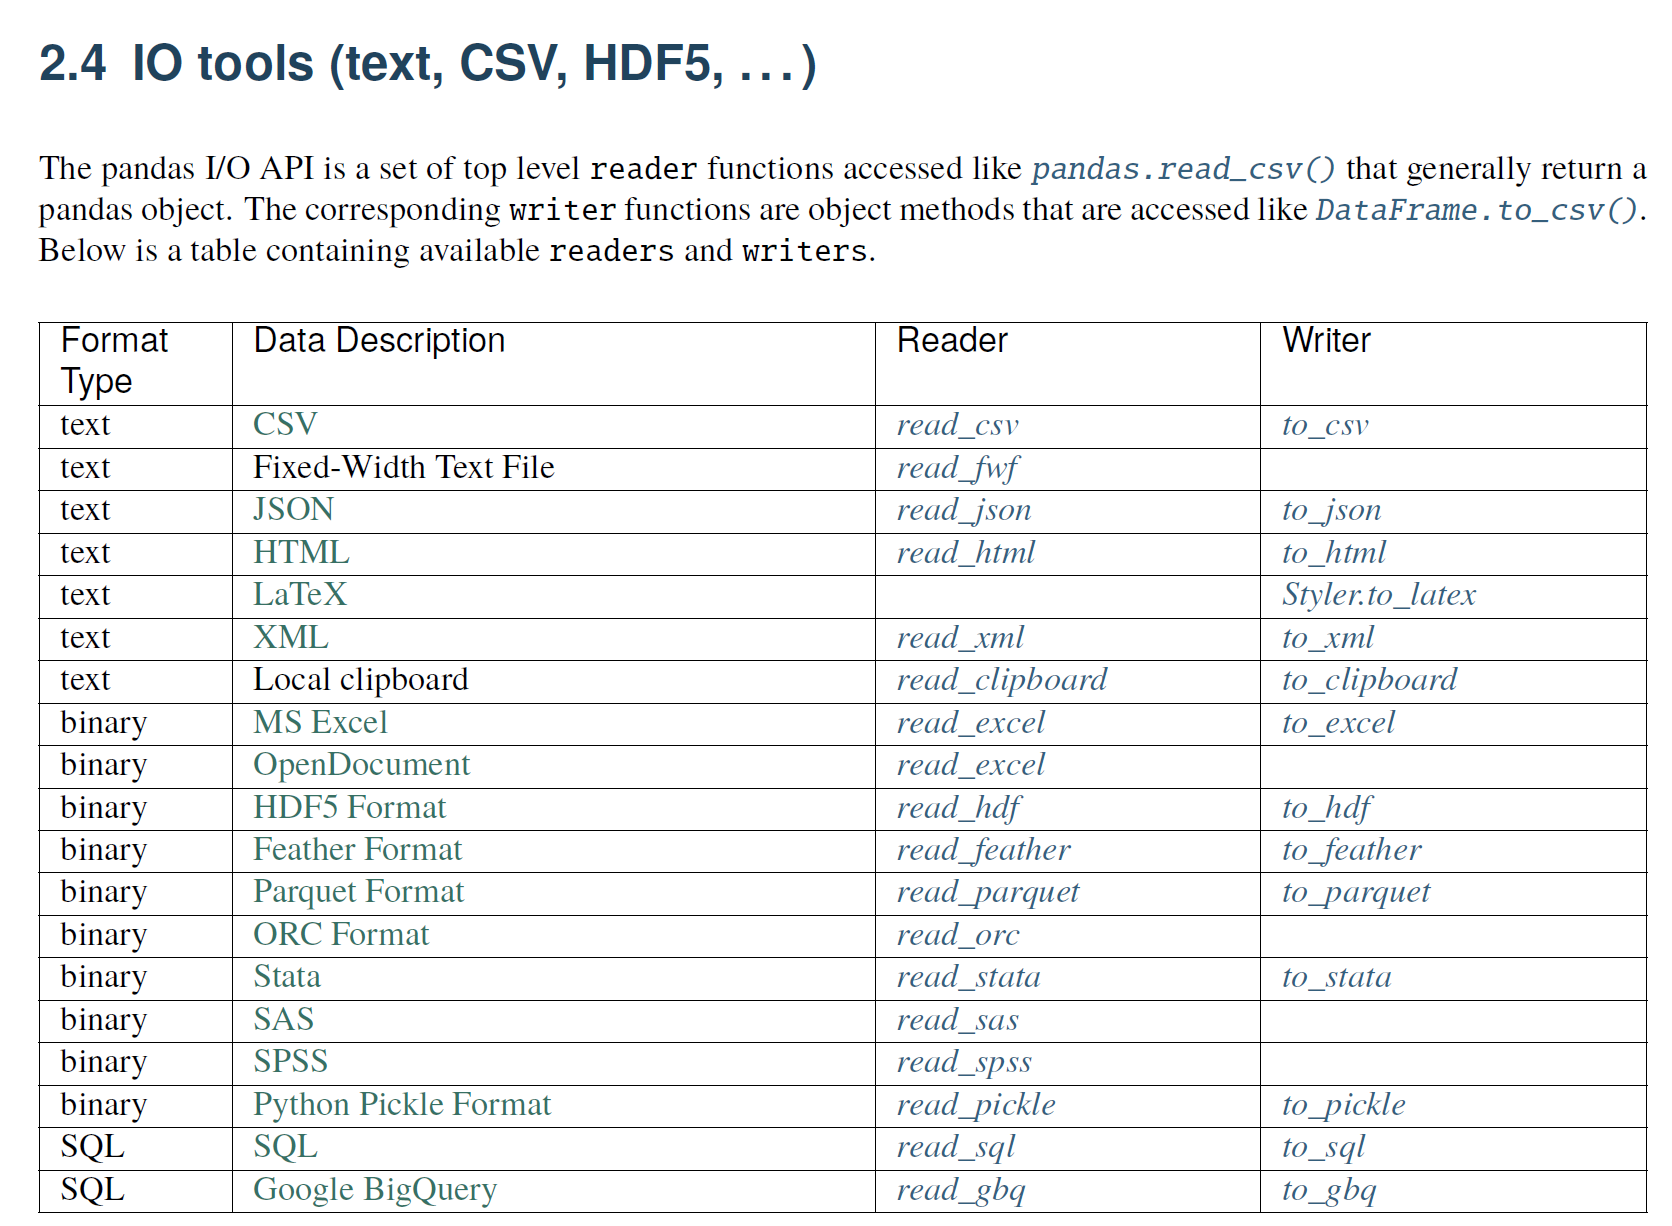

## CSV and Textual Files

## This type of file is the most common source of data and is easier to transcribe and interpret. In this regard, pandas provides a set of functions specific for this type of file.

## CSV & text files


## • read_csv
## • read_table
## • to_csv

## Parsing options
### read_csv() accepts the following common arguments:

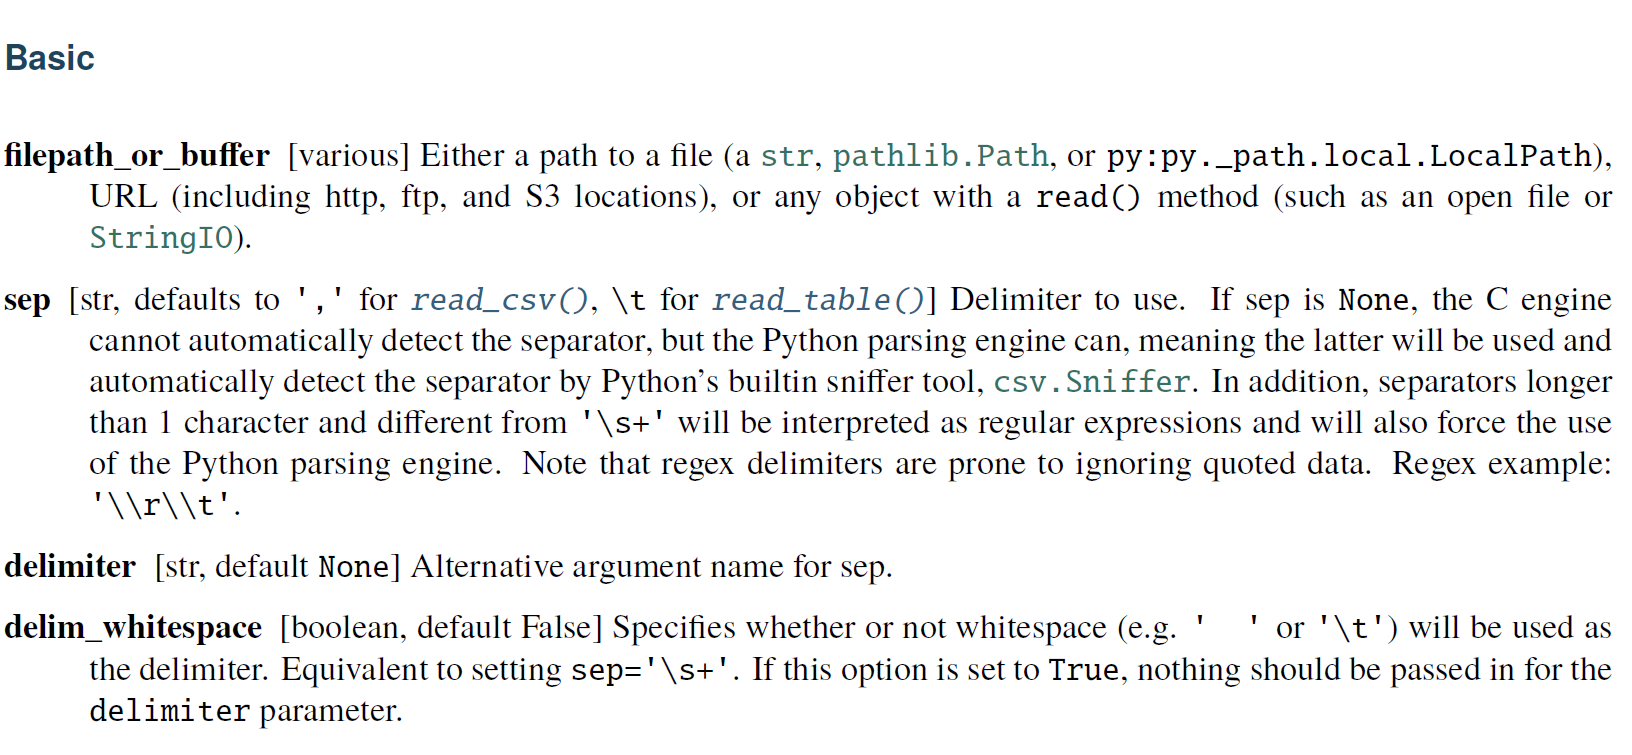

## There are various options on Column and index locations and names

### Options: header- example: skip_blank_lines=True, names: header=None, index_col: index_col=False, usecols: usecols=[0, 1], etc
### NA and missing data handling

### But before you start dealing with files, you need to import the following libraries.

In [2]:
import numpy as np
import pandas as pd

Listing 5-1. ch05_01.csv  
white,red,blue,green,animal  
1,5,2,3,cat  
2,7,8,5,dog  
3,3,6,7,horse  
2,2,8,3,duck  
4,4,2,1,mouse  

In [3]:
csvframe = pd.read_csv('ch05_01.csv')
csvframe

,white,red,blue,green,animal
0,1,5,2,3,cat
1,2,7,8,5,dog
2,3,3,6,7,horse
3,2,2,8,3,duck
4,4,4,2,1,mouse


In [4]:
pd.read_table('ch05_01.csv', sep=',')

,white,red,blue,green,animal
0,1,5,2,3,cat
1,2,7,8,5,dog
2,3,3,6,7,horse
3,2,2,8,3,duck
4,4,4,2,1,mouse


Listing 5-2. ch05_02.csv   
1,5,2,3,cat   
2,7,8,5,dog   
3,3,6,7,horse   
2,2,8,3,duck  
4,4,2,1,mouse  

In [5]:
pd.read_csv('ch05_02.csv')

,1,5,2,3,cat
0,2,7,8,5,dog
1,3,3,6,7,horse
2,2,2,8,3,duck
3,4,4,2,1,mouse


In this case, you could make sure that it is pandas that assigns the default names to the columns by setting the header option to None.

In [5]:
pd.read_csv('ch05_02.csv', header=None)

,0,1,2,3,4
0,1,5,2,3,cat
1,2,7,8,5,dog
2,3,3,6,7,horse
3,2,2,8,3,duck
4,4,4,2,1,mouse


you can specify the names directly by assigning a list of labels to the
names option.

In [8]:
pd.read_csv('ch05_02.csv', names=['white','red','blue','green','animal'])

,white,red,blue,green,animal
0,1,5,2,3,cat
1,2,7,8,5,dog
2,3,3,6,7,horse
3,2,2,8,3,duck
4,4,4,2,1,mouse


In more complex cases, in which you want to create a dataframe with a hierarchical
structure by reading a CSV file, you can extend the functionality of the read_csv() function
by adding the index_col option, assigning all the columns to be converted into indexes.
To better understand this possibility, create a new CSV file with two columns to be
used as indexes of the hierarchy. Then, save it in the working directory as ch05_03.csv
(see Listing 5-3).

## ch05_03.csv  
color,status,item1,item2,item3  
black,up,3,4,6  
black,down,2,6,7  
white,up,5,5,5  
white,down,3,3,2  
white,left,1,2,1  
red,up,2,2,2  
red,down,1,1,4  

create a new CSV file with two columns to be used as indexes of the hierarchy.

In [6]:
pd.read_csv('ch05_03.csv', index_col=['color','status'])

item1  item2  item3
color status                     
black up          3      4      6
      down        2      6      7
white up          5      5      5
      down        3      3      2
      left        1      2      1
red   up          2      2      2
      down        1      1      4

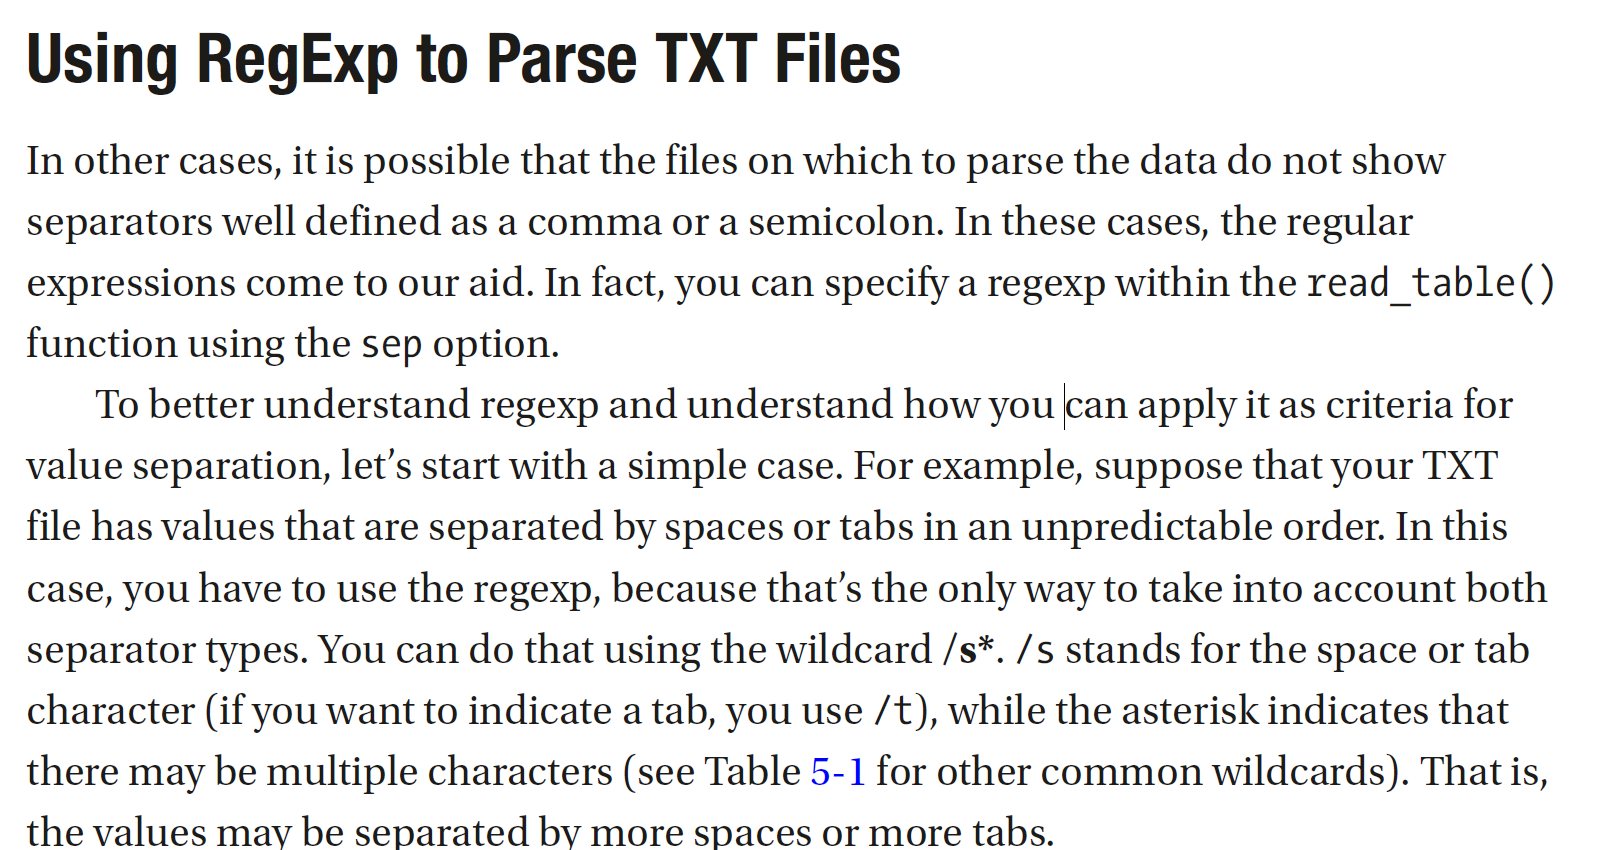

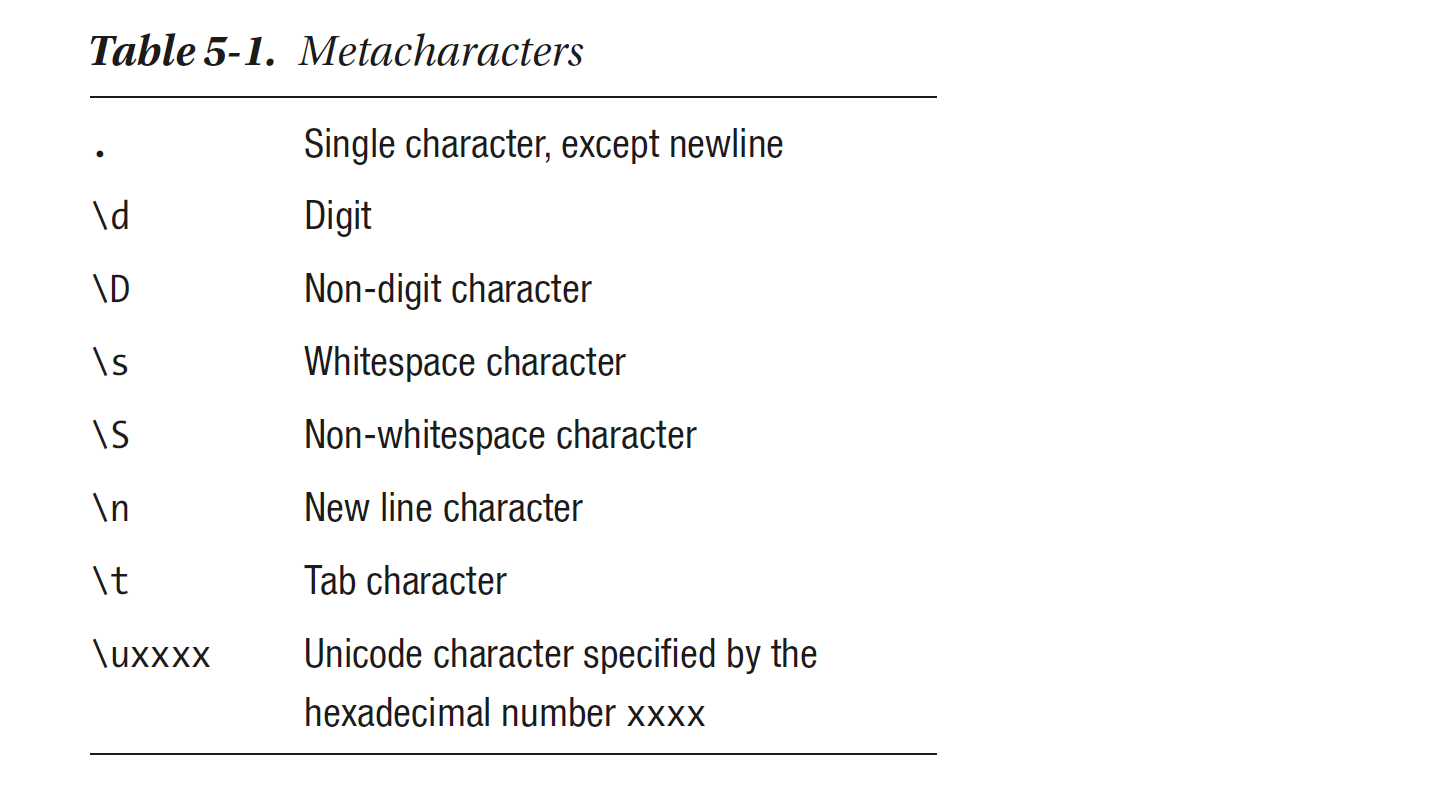

Take for example an extreme case in which we have the values separated by tabs or spaces in a random order

In [ ]:
ch05_04.txt  
white red   blue	green  
1 5		2 3  
2 7	8  5  
  3  3  6   7  

In [10]:
pd.read_table('ch05_04.txt', sep='\s+', engine='python')

,white,red,blue,green
0,1,5,2,3
1,2,7,8,5
2,3,3,6,7


Remember to set the header option to None whenever the column headings are not
present in the TXT file

## Non digit Charactor

### ch05_05.txt   
000END123AAA122   
001END124BBB321   
002END125CCC333  

In [8]:
pd.read_table('ch05_05.txt', sep='\D+', header=None, engine='python')

,0,1,2
0,0,123,122
1,1,124,321
2,2,125,333


### Exclude lines from parsing. 
you can exclude all the lines you want, just assigning an array
containing the line numbers to not consider in parsing.  
If you want to exclude the first five lines,    
you have to write skiprows = 5 

This file has been generated by automatic system  
white,red,blue,green,animal  
12-Feb-2015: Counting of animals inside the house  
1,5,2,3,cat  
2,7,8,5,dog  
13-Feb-2015: Counting of animals outside the house  
3,3,6,7,horse  
2,2,8,3,duck  
4,4,2,1,mouse  

In [10]:
pd.read_table('ch05_06.txt', sep=',', skiprows=5)

,2,7,8,5,dog
0,13-Feb-2015: Counting of animals outside the h...,NaN,NaN,NaN,NaN
1,3,3.0,6.0,7.0,horse
2,2,2.0,8.0,3.0,duck
3,4,4.0,2.0,1.0,mouse


But if you want to rule out the fifth line, you have
to write skiprows = [5].

In [10]:
#Exclude rows 0,1,3,6
pd.read_table('ch05_06.txt', sep=',', skiprows=[0,1,3,6])

,white,red,blue,green,animal
0,1,5,2,3,cat
1,2,7,8,5,dog
2,3,3,6,7,horse
3,2,2,8,3,duck
4,4,4,2,1,mouse


### Reading TXT Files into Parts or Partially

In [ ]:
1,5,2,3,cat
2,7,8,5,dog
3,3,6,7,horse
2,2,8,3,duck
4,4,2,1,mouse

In [11]:
pd.read_csv('ch05_02.csv',skiprows=[2],nrows=3,header=None)

,0,1,2,3,4
0,1,5,2,3,cat
1,2,7,8,5,dog
2,2,2,8,3,duck


you can select the starting line n (SkipRows=n) and the lines to be read after it (nrows = i).

In [14]:
pd.read_csv('ch05_02.csv',skiprows=[2],nrows=4,header=None)

,0,1,2,3,4
0,1,5,2,3,cat
1,2,7,8,5,dog
2,2,2,8,3,duck
3,4,4,2,1,mouse


### Writing Data in CSV

In [12]:
frame = pd.DataFrame(np.arange(16).reshape((4,4)),
          index=['red', 'blue', 'yellow', 'white'],
          columns=['ball','pen','pencil','paper'])
frame

,ball,pen,pencil,paper
red,0,1,2,3
blue,4,5,6,7
yellow,8,9,10,11
white,12,13,14,15


In [13]:
frame.to_csv('ch05_07.csv')

In [ ]:
,ball,pen,pencil,paper
red,0,1,2,3
blue,4,5,6,7
yellow,8,9,10,11
white,12,13,14,15

In [17]:
#Reading
frame2 = pd.read_csv('ch05_07.csv')
frame2

,Unnamed: 0,ball,pen,pencil,paper
0,red,0,1,2,3
1,blue,4,5,6,7
2,yellow,8,9,10,11
3,white,12,13,14,15


In [15]:
frame.to_csv('ch05_07b.csv', index=False, header=False)

In [ ]:
0,1,2,3
4,5,6,7
8,9,10,11
12,13,14,15

In [21]:
frame2 = pd.read_csv('ch05_07b.csv',header=None)
frame2

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


One point to remember when writing files is that NaN values present in a data
structure are shown as empty fields in the file (see Listing 5-9).

In [22]:
frame3 = pd.DataFrame([[6,np.nan,np.nan,6,np.nan],
              [np.nan,np.nan,np.nan,np.nan,np.nan],
              [np.nan,np.nan,np.nan,np.nan,np.nan],
              [20,np.nan,np.nan,20.0,np.nan],
              [19,np.nan,np.nan,19.0,np.nan]
             ],
                     index=['blue','green','red','white','yellow'],
                     columns=['ball','mug','paper','pen','pencil'])

In [24]:
frame3.to_csv('ch5_08.csv')

In [ ]:
,ball,mug,paper,pen,pencil
blue,6.0,,,6.0,
green,,,,,
red,,,,,
white,20.0,,,20.0,
yellow,19.0,,,19.0,

In [25]:
frame4 = pd.read_csv('ch5_08.csv')
frame4

,Unnamed: 0,ball,mug,paper,pen,pencil
0,blue,6.0,NaN,NaN,6.0,NaN
1,green,NaN,NaN,NaN,NaN,NaN
2,red,NaN,NaN,NaN,NaN,NaN
3,white,20.0,NaN,NaN,20.0,NaN
4,yellow,19.0,NaN,NaN,19.0,NaN


However, you can replace this empty field with a value to your liking using the na_rep option in the to_csv() function. Common values may be NULL, 0, or the same NaN (see Listing 5-10).

In [30]:
frame3.to_csv('ch5_09.csv', na_rep = 0)

In [31]:
frame5 = pd.read_csv('ch5_09.csv')
frame5

,Unnamed: 0,ball,mug,paper,pen,pencil
0,blue,6.0,0,0,6.0,0
1,green,0.0,0,0,0.0,0
2,red,0.0,0,0,0.0,0
3,white,20.0,0,0,20.0,0
4,yellow,19.0,0,0,19.0,0


# Reading and Writing HTML (Hyper Test Markup Language) Files

#### Because the data structures as the dataframe can be quite complex and large, it’s great to have a function like this when you need to develop web pages.

### Pandas provides the corresponding pair of I/O API functions for the HTML format.
#### • read_html()  
#### • to_html()   

### Writing Data in HTML

In [32]:
frame = pd.DataFrame(np.arange(4).reshape(2,2))
frame

,0,1
0,0,1
1,2,3


## Now you learn how to convert a dataframe into an HTML table.

In [33]:
print(frame.to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
      <th>1</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>3</td>
    </tr>
  </tbody>
</table>


In [25]:
frame = pd.DataFrame( np.random.random((4,4)),
                    index = ['white','black','red','blue'],
                    columns = ['up','down','right','left'])
frame

,up,down,right,left
white,0.361696,0.752008,0.322252,0.432835
black,0.836611,0.451658,0.175752,0.818455
red,0.886767,0.472090,0.506660,0.253788
blue,0.801455,0.840466,0.000758,0.702572


In [34]:
s = ['<HTML>']
s.append('<HEAD><TITLE>My DataFrame</TITLE></HEAD>')
s.append('<BODY>')
s.append(frame.to_html())
s.append('</BODY></HTML>')
html = ''.join(s)

In [36]:
html

'<HTML><HEAD><TITLE>My DataFrame</TITLE></HEAD><BODY><table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>0</th>\n      <th>1</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>0</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2</td>\n      <td>3</td>\n    </tr>\n  </tbody>\n</table></BODY></HTML>'

In [43]:
html_file = open('myFrame.html','w')
html_file.write(html)
html_file.close()

Now in your working directory will be a new HTML file, myFrame.html. Double-click
it to open it directly from the browser. An HTML table will appear in the upper left, as
shown in Figure 5-1.

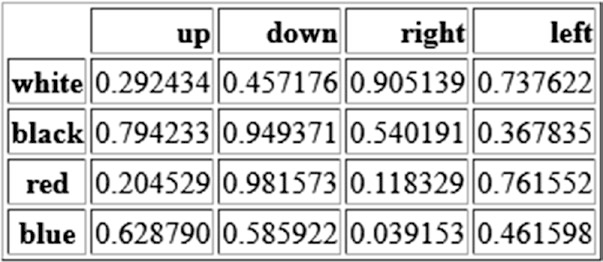

## Reading Data from an HTML File

### The top-level read_html() function can accept an HTML string/file/URL and will parse HTML tables into list of pandas DataFrames

### read_html returns a list of DataFrame objects, even if there is only a single table contained in the HTML content.

Pandas can easily generate HTML tables starting from the dataframe.
The function read_html () will perform a parsing an HTML page 
looking for an HTML table. If found, it will convert that table into an
object dataframe ready to be used in our data analysis.

In [11]:
#! pip install html5lib

In [45]:
web_frames = pd.read_html('myFrame.html')
web_frames[0]

,Unnamed: 0,0,1
0,0,0,1
1,1,2,3


In [46]:
web_frames

[   Unnamed: 0  0  1
 0           0  0  1
 1           1  2  3]

#### Now you will call a web page where there is an HTML table that shows a ranking list with some names and scores.

In [10]:
ranking = pd.read_html('https://www.meccanismocomplesso.org/en/meccanismo-complesso-sito-2/classifica-punteggio/')
ranking[0]

,Unnamed: 0,Member,Points,Levels
0,1,BrunoOrsini,2075,NaN
1,2,Berserker,700,NaN
2,3,albertosallu,275,NaN
3,4,Jon,180,NaN
4,5,Mr.Y,180,NaN
...,...,...,...,...
110,111,Gigi Bertana,5,NaN
111,112,p.barut,5,NaN
112,113,Indri4Africa,5,NaN
113,114,ghirograf,5,NaN


## Writing to HTML files

### DataFrame objects have an instance method to_html which renders the contents of the DataFrame as an HTML table. The function arguments are as in the method to_string

In [13]:
from IPython.display import display, HTML
df = pd.DataFrame(np.random.randn(2, 2))
df

,0,1
0,-0.334345,1.013803
1,-0.115218,-0.703686


In [14]:
html = df.to_html()
html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>0</th>\n      <th>1</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>-0.334345</td>\n      <td>1.013803</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>-0.115218</td>\n      <td>-0.703686</td>\n    </tr>\n  </tbody>\n</table>'

# 2.4.5 XML

## Reading Data from XML (Extensible Markup Language)

### The top-level read_xml() function can accept an XML string/file/URL and will parse nodes and attributes into a pandas DataFrame.

### Note: Since there is no standard XML structure where design types can vary in many ways, read_xml works best with flatter, shallow versions. If an XML document is deeply nested, use the stylesheet feature to transform XML into a flatter version.

In [ ]:
#books.xml
<?xml version="1.0"?>

-<Catalog>


-<Book id="ISBN9872122367564">

<Author>Ross, Mark</Author>

<Title>XML Cookbook</Title>

<Genre>Computer</Genre>

<Price>23.56</Price>

<PublishDate>2014-22-01</PublishDate>

</Book>


-<Book id="ISBN9872122367564">

<Author>Bracket, Barbara</Author>

<Title>XML for Dummies</Title>

<Genre>Computer</Genre>

<Price>35.95</Price>

<PublishDate>2014-12-16</PublishDate>

</Book>

</Catalog>

In [15]:
df = pd.read_xml('books.xml')
df

,id,Author,Title,Genre,Price,PublishDate
0,ISBN9872122367564,"Ross, Mark",XML Cookbook,Computer,23.56,2014-22-01
1,ISBN9872122367564,"Bracket, Barbara",XML for Dummies,Computer,35.95,2014-12-16


In [18]:
df = pd.read_xml("s3://pmc-oa-opendata/oa_comm/xml/all/PMC1236943.xml",xpath=".//journal-meta",)
df

,journal-id,journal-title,issn,publisher
0,Cardiovasc Ultrasound,Cardiovascular Ultrasound,1476-7120,NaN


In [20]:
# df = pd.read_xml(file_path, xpath="//book[year=2005]")

In [22]:
xml = """<?xml version='1.0' encoding='utf-8'?>
<doc:data xmlns:doc="https://example.com">
<doc:row>
<doc:shape>square</doc:shape>
<doc:degrees>360</doc:degrees>
<doc:sides>4.0</doc:sides>
</doc:row>
<doc:row>
<doc:shape>circle</doc:shape>
<doc:degrees>360</doc:degrees>
<doc:sides/>
</doc:row>
<doc:row>
<doc:shape>triangle</doc:shape>
<doc:degrees>180</doc:degrees>
<doc:sides>3.0</doc:sides>
</doc:row>
</doc:data>"""

In [24]:
df = pd.read_xml(xml,xpath="//doc:row",namespaces={"doc": "https://example.com"})
df

,shape,degrees,sides
0,square,360,4.0
1,circle,360,NaN
2,triangle,180,3.0


In [48]:
from lxml import objectify
xml = objectify.parse('books.xml')
xml

To navigate in this tree structure, so as to select element by element, you must first define the root. You can do this with the
getroot() function.

In [49]:
root = xml.getroot()

In [50]:
root.Book.Author

'Ross, Mark'

In [51]:
root.Book.PublishDate

'2014-22-01'

### In this way you access nodes individually, but you can access various elements at thesame time using getchildren(). With this function, you’ll get all the child nodes of the reference element.

In [52]:
root.getchildren()

[<Element Book at 0x21c89114d00>, <Element Book at 0x21c89114a00>]

In [53]:
[child.tag for child in root.Book.getchildren()]

['Author', 'Title', 'Genre', 'Price', 'PublishDate']

In [54]:
[child.text for child in root.Book.getchildren()]

['Ross, Mark', 'XML Cookbook', 'Computer', '23.56', '2014-22-01']

### Define the following function, which has the task of analyzing the contents of an eTree to fill a dataframe line by line.

In [2]:
import pandas as pd

In [41]:
def etree2df(root):
    column_names = []
    for i in range(0, len(root.getchildren()[0].getchildren())):
        column_names.append(root.getchildren()[0].getchildren()[i].tag)
    xmlframe = pd.DataFrame(columns=column_names)
    for j in range(0, len(root.getchildren())):
        obj = root.getchildren()[j].getchildren()
        texts = []
        for k in range(0, len(column_names)):
            texts.append(obj[k].text)
        row = dict(zip(column_names, texts))
        row_s = pd.Series(row)
        row_s.name = j
        xmlframe = xmlframe.append(row_s)
    return xmlframe

In [42]:
etree2df(root)

C:\Users\user\AppData\Local\Temp\ipykernel_3068\468177009.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  xmlframe = xmlframe.append(row_s)
C:\Users\user\AppData\Local\Temp\ipykernel_3068\468177009.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  xmlframe = xmlframe.append(row_s)


,Author,Title,Genre,Price,PublishDate
0,"Ross, Mark",XML Cookbook,Computer,23.56,2014-22-01
1,"Bracket, Barbara",XML for Dummies,Computer,35.95,2014-12-16


## Writing XML

### DataFrame objects have an instance method to_xml which renders the contents of the DataFrame as an XML document.

In [25]:
geom_df = pd.DataFrame(
{
"shape": ["square", "circle", "triangle"],
"degrees": [360, 360, 180],
"sides": [4, np.nan, 3],
}
)

In [26]:
geom_df

,shape,degrees,sides
0,square,360,4.0
1,circle,360,NaN
2,triangle,180,3.0


In [27]:
print(geom_df.to_xml())

<?xml version='1.0' encoding='utf-8'?>
<data>
  <row>
    <index>0</index>
    <shape>square</shape>
    <degrees>360</degrees>
    <sides>4.0</sides>
  </row>
  <row>
    <index>1</index>
    <shape>circle</shape>
    <degrees>360</degrees>
    <sides/>
  </row>
  <row>
    <index>2</index>
    <shape>triangle</shape>
    <degrees>180</degrees>
    <sides>3.0</sides>
  </row>
</data>


## 2.4.6 Excel files

## Reading and Writing Data on Microsoft Excel Files

### Pandas provides specific functions for this type of format. 
### You have seen that the I/OAPI provides two functions to this purpose:  
• to_excel()   
• read_excel()    
The read_excel() function can read Excel 2003 (.xls) files and Excel 2007 (.xlsx) files  

### The read_excel() method can read Excel 2007+ (.xlsx) files using the openpyxl Python module. Excel 2003 (.xls) files can be read using xlrd. Binary Excel (.xlsb) files can be read using pyxlsb. The to_excel() instance method is used for saving a DataFrame to Excel. Generally the semantics are similar to working with csv data. See the cookbook for some advanced strategies.

In [55]:
pd.read_excel('ch05_data.xlsx')

,Unnamed: 0,white,red,green,black
0,a,12,23,17,18
1,b,22,16,19,18
2,c,14,23,22,21


By default returned dataframe is composed of the data tabulated in the first spreadsheets. If, however, you need to load the data in the second spreadsheet, you must then specify the name of the sheet or the number of the sheet (index) just as the second argument.

In [44]:
pd.read_excel('ch05_data.xlsx','Sheet2')

,Unnamed: 0,yellow,purple,blue,orange
0,A,11,16,44,22
1,B,20,22,23,44
2,C,30,31,37,32


In [47]:
pd.read_excel('ch05_data.xlsx',1)

,Unnamed: 0,yellow,purple,blue,orange
0,A,11,16,44,22
1,B,20,22,23,44
2,C,30,31,37,32


The same applies for writing. To convert a dataframe into a spreadsheet on Excel, you have to write the following.

In [48]:
import numpy as np
frame = pd.DataFrame(np.random.random((4,4)),
                    index = ['exp1','exp2','exp3','exp4'],
                    columns = ['Jan2015','Feb2015','Mar2015','Apr2015'])
frame

,Jan2015,Feb2015,Mar2015,Apr2015
exp1,0.040364,0.638589,0.449167,0.532951
exp2,0.810926,0.671650,0.058138,0.320204
exp3,0.748487,0.119967,0.696882,0.968328
exp4,0.462836,0.032948,0.729401,0.142630


In [51]:
frame.to_excel('ch05_data02.xlsx')

In [52]:
data=pd.read_excel('ch05_data02.xlsx')
data

,Unnamed: 0,Jan2015,Feb2015,Mar2015,Apr2015
0,exp1,0.040364,0.638589,0.449167,0.532951
1,exp2,0.810926,0.671650,0.058138,0.320204
2,exp3,0.748487,0.119967,0.696882,0.968328
3,exp4,0.462836,0.032948,0.729401,0.142630


## JSON Data

## Read and write JSON format files and strings.

### JSON (JavaScript Object Notation) has become one of the most common standard formats, especially for the transmission of data on the Web. So it is normal to work with this data format if you want to use data on the Web.

## Writing JSON
### A Series or DataFrame can be converted to a valid JSON string. Use to_json with optional parameters:

In [1]:
import pandas as pd
import numpy as np
dfj = pd.DataFrame(np.random.randn(5, 2), columns=list("AB"))
dfj

,A,B
0,-0.220207,-0.923758
1,1.378084,0.514676
2,-0.037592,0.645491
3,-0.219114,-0.349127
4,-0.215714,0.312648


In [2]:
json = dfj.to_json()
json

'{"A":{"0":-0.2202071426,"1":1.378084232,"2":-0.0375923005,"3":-0.2191138586,"4":-0.2157136376},"B":{"0":-0.9237576438,"1":0.5146762763,"2":0.6454908608,"3":-0.3491271799,"4":0.3126482419}}'

In [11]:
dfj.to_json('json.json')

In [12]:
pd.read_json('json.json')

,A,B
0,-1.426430,-2.230656
1,-0.092165,-0.463942
2,0.090779,-0.273401
3,0.553720,-1.474364
4,-0.296726,1.150269


In [6]:
frame = pd.DataFrame(np.arange(16).reshape(4,4),
                    index=['white','black','red','blue'],
                    columns=['up','down','right','left'])

In [7]:
frame

,up,down,right,left
white,0,1,2,3
black,4,5,6,7
red,8,9,10,11
blue,12,13,14,15


In [8]:
frame.to_json('frame1.json')

In [9]:
pd.read_json('frame.json')

,up,down,right,left
white,0,1,2,3
black,4,5,6,7
red,8,9,10,11
blue,12,13,14,15


This web application, once you enter or copy data in JSON format, allows you to see if the format you entered
is valid. Moreover it displays the tree structure so that you can better understand its
structure.

#### This web application, once you enter or copy data in JSON format, allows you to see if the format you entered is valid. 
#### Moreover it displays the tree structure so that you can better understand itsstructure.

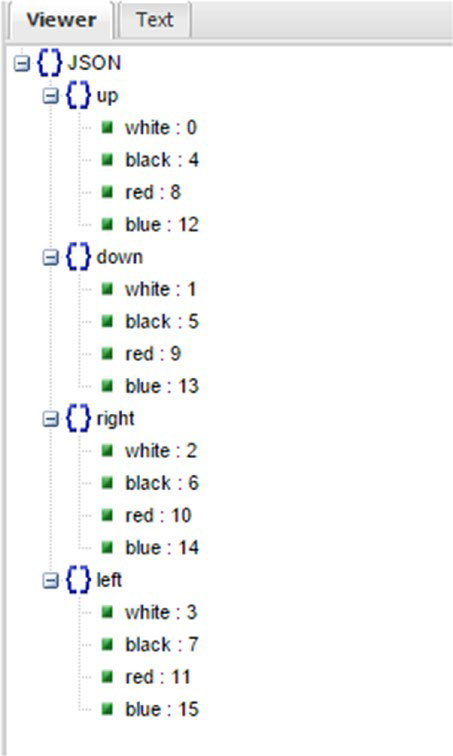

In [63]:
import pandas as pd
from pandas.io.json import json_normalize

In [64]:
file = open('books.json','r')
text = file.read()
text = pd.io.json.loads(text)

In [65]:
text

[{'writer': 'Mark Ross',
  'nationality': 'USA',
  'books': [{'title': 'XML Cookbook', 'price': 23.56},
   {'title': 'Python Fundamentals', 'price': 50.7},
   {'title': 'The NumPy library', 'price': 12.3}]},
 {'writer': 'Barbara Bracket',
  'nationality': 'UK',
  'books': [{'title': 'Java Enterprise', 'price': 28.6},
   {'title': 'HTML5', 'price': 31.35},
   {'title': 'Python for Dummies', 'price': 28.0}]}]

Now you are ready to apply the json_normalize() function. From a quick look at the
contents of the data within the JSON file, for example, you might want to extract a table
that contains all the books. Then write the books key as the second argument.

In [66]:
json_normalize(text,'books')

C:\Users\user\AppData\Local\Temp\ipykernel_3068\2223923742.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  json_normalize(text,'books')


,title,price
0,XML Cookbook,23.56
1,Python Fundamentals,50.70
2,The NumPy library,12.30
3,Java Enterprise,28.60
4,HTML5,31.35
5,Python for Dummies,28.00


In [67]:
json_normalize(text,'books',['writer','nationality'])

C:\Users\user\AppData\Local\Temp\ipykernel_3068\1694040969.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  json_normalize(text,'books',['writer','nationality'])


,title,price,writer,nationality
0,XML Cookbook,23.56,Mark Ross,USA
1,Python Fundamentals,50.70,Mark Ross,USA
2,The NumPy library,12.30,Mark Ross,USA
3,Java Enterprise,28.60,Barbara Bracket,UK
4,HTML5,31.35,Barbara Bracket,UK
5,Python for Dummies,28.00,Barbara Bracket,UK


## The Format HDF5 (hierarchical data format)

So far you have seen how to write and read data in text format. When your data analysis
involves large amounts of data, it is preferable to use them in binary format. There are
several tools in Python to handle binary data. A library that is having some success in
this area is the HDF5 library.

The HDF term stands for hierarchical data format, and in fact this library is
concerned with reading and writing HDF5 files containing a structure with nodes and
the possibility to store multiple datasets.

In [68]:
from pandas.io.pytables import HDFStore

In [69]:
frame = pd.DataFrame(np.arange(16).reshape(4,4),
                    index=['white','black','red','blue'],
                    columns=['up','down','right','left'])
store = HDFStore('ch05_data.h5')
store['obj1'] = frame

In [71]:
frame2 = pd.DataFrame(np.arange(0,8,0.5).reshape(4,4))
frame2

,0,1,2,3
0,0.0,0.5,1.0,1.5
1,2.0,2.5,3.0,3.5
2,4.0,4.5,5.0,5.5
3,6.0,6.5,7.0,7.5


In [72]:
store['obj2'] = frame2

In [73]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: ch05_data.h5

In [75]:
store['obj2']

,0,1,2,3
0,0.0,0.5,1.0,1.5
1,2.0,2.5,3.0,3.5
2,4.0,4.5,5.0,5.5
3,6.0,6.5,7.0,7.5


## Pickle - Python Object Serialization

### Serialize a Python Object with cPickle

The pickle module implements a powerful algorithm for serialization and
deserialization of a data structure implemented in Python. Pickling is the process in
which the hierarchy of an object is converted into a stream of bytes

## Serialize a Python Object with cPickle

In [76]:
#On python3.x cPickle has changed from cPickle to _pickle. Thus in python3.x, you can do the following if you want to use cPickle:
import _pickle as pickle

In [77]:
data = { 'color': ['white','red'], 'value': [5, 7]}
pickled_data = pickle.dumps(data)
pickled_data

b'\x80\x04\x95/\x00\x00\x00\x00\x00\x00\x00}\x94(\x8c\x05color\x94]\x94(\x8c\x05white\x94\x8c\x03red\x94e\x8c\x05value\x94]\x94(K\x05K\x07eu.'

In [78]:
print(pickled_data)

b'\x80\x04\x95/\x00\x00\x00\x00\x00\x00\x00}\x94(\x8c\x05color\x94]\x94(\x8c\x05white\x94\x8c\x03red\x94e\x8c\x05value\x94]\x94(K\x05K\x07eu.'


In [79]:
nframe = pickle.loads(pickled_data)
nframe

{'color': ['white', 'red'], 'value': [5, 7]}

### Pickling with pandas

In [80]:
frame = pd.DataFrame(np.arange(16).reshape(4,4),
                    index=['up','down','left','right'])
frame.to_pickle('frame.pkl')

In [81]:
pd.read_pickle('frame.pkl')

,0,1,2,3
up,0,1,2,3
down,4,5,6,7
left,8,9,10,11
right,12,13,14,15


## Interacting with Databases

### The data are often stored in an SQL-based relational database, and also in manyalternative NoSQL databases that have become very popular in recent times.

## Loading data from SQL in a dataframe is sufficiently simple and pandas has somefunctions to simplify the process.

### Loading and Writing Data with SQLite3

### SQLite3 is a tool that implements a DBMS SQL in a very simple and lightweightway, so it can be  incorporated in any application implemented with the Pythonlanguage.

In [82]:
import pandas as pd
import numpy as np

In [86]:
from sqlalchemy import create_engine #For PostgreSQL:

In [87]:
frame = pd.DataFrame(np.arange(20).reshape(4,5),
                    columns=['white','red','blue','black','green'])
frame

,white,red,blue,black,green
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


## Implement the connection to the SQLite3 database.

In [88]:
engine = create_engine('sqlite:///foo.db')

### Convert the dataframe in a table within the database.

In [90]:
frame.to_sql('colors4',engine)

4

In [91]:
pd.read_sql('colors4',engine)

,index,white,red,blue,black,green
0,0,0,1,2,3,4
1,1,5,6,7,8,9
2,2,10,11,12,13,14
3,3,15,16,17,18,19


In [92]:
import sqlite3
query = """
         CREATE TABLE test
         (a VARCHAR(20), b VARCHAR(20),
          c REAL,        d INTEGER
         );"""
con = sqlite3.connect(':memory:')
con.execute(query)

In [93]:
con.commit()

In [94]:
data = [('white','up',1,3),
        ('black','down',2,8),
        ('green','up',4,4),
        ('red','down',5,5)]
stmt = "INSERT INTO test VALUES(?,?,?,?)"
con.executemany(stmt, data)

In [95]:
con.commit()

In [96]:
cursor = con.execute('select * from test')
cursor

In [98]:
rows = cursor.fetchall()
rows

[]

In [68]:
cursor.description

(('a', None, None, None, None, None, None),
 ('b', None, None, None, None, None, None),
 ('c', None, None, None, None, None, None),
 ('d', None, None, None, None, None, None))

### Loading and Writing Data with PostgreSQL

In [69]:
pd.__version__

'1.4.4'

In [72]:
frame = pd.DataFrame(np.random.random((4,4)),
                    index=['exp1','exp2','exp3','exp4'],
                    columns=['feb','mar','apr','may']);
frame.to_sql('dataframe1',engine)

4

In [58]:
pd.read_sql_table('dataframe',engine)

,index,feb,mar,apr,may
0,exp1,0.043294,0.189178,0.082910,0.816704
1,exp2,0.642352,0.328553,0.612097,0.158483
2,exp3,0.025406,0.844586,0.338951,0.820036
3,exp4,0.903815,0.081186,0.713351,0.107790


In [73]:
frame = pd.DataFrame( np.arange(20).reshape(4,5), 
                      columns = ['white','red','blue','black','green'])
frame

,white,red,blue,black,green
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [74]:
import json
record = json.loads(frame.T.to_json()).values
record

<function dict.values>